# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set selected for analysis is from The Movie Data (TMDb). It contains data on about 10,000 movies between the years of 1960 and 2015. This report will go through the complete process of data analysis. We will wrangle and clean data, compute statistics and create visualizations, and draw conclusions from findings.

> The questions we will explore:
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. Has runtime changed over the years?

In [46]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [47]:
# Load data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [48]:
df.shape

(10866, 21)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There are a total of 10866 rows and 21 columns of data, but there are also null values and potentially duplicate rows. In the following section, we will clean up the data to keep only what is relevant. 

### Data Cleaning

In [50]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [51]:
df.shape

(10865, 21)

There was only one row of data that was a duplicate.

In [52]:
# drop columns
df.drop(['budget', 'revenue', 'id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], axis = 1, inplace = True)
df.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 933.7+ KB


After dropping columns that are not relevant to the analysis, we are left with 10 columns. Only 'genres' still has null values so we will filter that out.

In [54]:
# remove rows where 'genres' is null
df = df[df['genres'].notna()]
df.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 931.7+ KB


Now that the main dataframe is cleaned up with no duplicates and no null values, we want to create a second dataframe. 'genres' is currently a string of multiple genres separated by pipelines. This second dataframe will split 'genres' and create a new row for each of the genre a movie falls into.

In [56]:
# create a copy of df to build the second dataframe 
df_genres_rows = df.copy()

In [57]:
# split() returns a Series object. apply Series function. If func returns a Series object the result will be a DataFrame. stack() is an attribute only for DataFrame.
genres_rows = df_genres_rows['genres'].str.split('|').apply(Series, 1).stack()
# The droplevel() function is used to return a DataFrame with requested index / column level(s) removed.
genres_rows.index = genres_rows.index.droplevel(-1)
# assign column name
genres_rows.name = 'genres'
# drop 'genres' from df so that we can join the new genres column 
df_genres_rows.drop('genres', axis = 1, inplace = True)

In [58]:
# join the new genres column
df_genres_rows = df_genres_rows.join(genres_rows)

In [59]:
df_genres_rows.head()

,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [60]:
df_genres_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 10865
Data columns (total 10 columns):
popularity        26955 non-null float64
original_title    26955 non-null object
runtime           26955 non-null int64
release_date      26955 non-null object
vote_count        26955 non-null int64
vote_average      26955 non-null float64
release_year      26955 non-null int64
budget_adj        26955 non-null float64
revenue_adj       26955 non-null float64
genres            26955 non-null object
dtypes: float64(4), int64(3), object(3)
memory usage: 2.3+ MB


With df and df_genres_rows cleaned and prepared, we are now ready for exploratory data analysis on our three research questions.

<a id='eda'></a>
## Exploratory Data Analysis

> Compute statistics and create visualizations with the goal of addressing the research questions that are posed.

### Research Question 1: Which genres are most popular from year to year? 

Using df_genres_rows that we just created, we want to aggregate by movie release year and by genre, and focus on the average popularity.

In [61]:
genre_pop_year = df_genres_rows.groupby(['release_year','genres'])['popularity'].mean()
genre_pop_year.head()

release_year  genres   
1960          Action       0.590724
              Adventure    0.700981
              Comedy       0.396000
              Crime        0.346480
              Drama        0.566305
Name: popularity, dtype: float64

In [62]:
genre_pop_year = genre_pop_year.unstack()
genre_pop_year.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.700981,NaN,0.396000,0.346480,NaN,0.566305,0.278064,0.428247,0.194948,0.412364,0.591450,0.423531,NaN,0.541227,0.327905,NaN,0.811910,0.225863,0.567759
1961,0.365913,0.767323,2.631987,0.679838,0.806519,NaN,0.432233,0.755722,0.154073,0.113651,0.334463,0.254578,0.564749,0.712793,0.426036,0.274103,NaN,NaN,0.531184,0.210021
1962,0.708945,0.942513,NaN,0.273183,0.472816,NaN,0.392000,0.323463,0.235542,0.235542,0.600060,0.179368,0.323933,0.259220,0.365621,0.179212,NaN,0.760582,0.506162,0.414180
1963,0.951729,0.728487,2.180410,0.444481,0.552367,NaN,0.322448,0.852632,0.214071,0.351647,0.481618,0.376901,NaN,0.421033,0.399573,0.467836,NaN,0.719929,0.664326,0.246957
1964,0.813087,0.736431,0.445746,0.491229,0.261690,NaN,0.364818,0.878298,0.599791,0.152209,0.316377,0.189650,0.753799,0.308091,0.221586,0.226636,NaN,0.622580,0.930959,0.127679


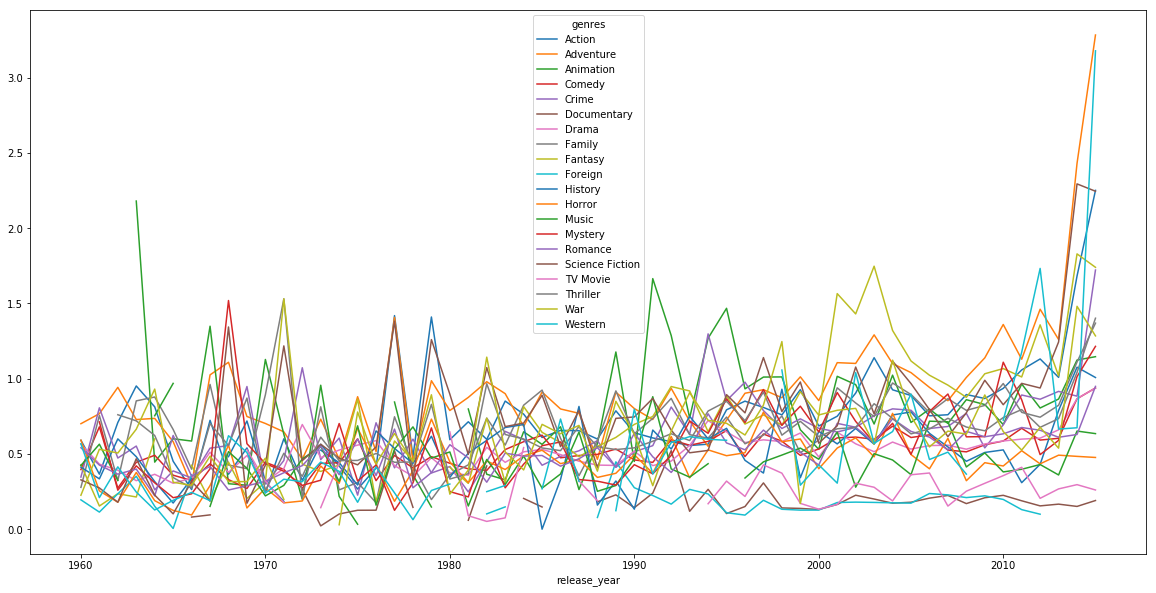

In [63]:
# quick line plot to see any trends
genre_pop_year.plot(figsize = (20,10));

Initially, I thought that we could see some trend of a genre's popularity over the years, but there are too many genres and too many years involved. Instead, in the following steps, we will find the genre of the maximum popularity for each year, and count the frequency of that genre. The genre with the highest frequency will be the most popular genre over the years. 

In [64]:
# find the max popularity of each row (year) in genre_pop_year
max_pop = genre_pop_year.max(axis = 1)
max_pop.name = 'max_popularity'
max_pop.head()

release_year
1960    0.811910
1961    2.631987
1962    0.942513
1963    2.180410
1964    0.930959
Name: max_popularity, dtype: float64

In [65]:
# find the genre of the max popularity of each row in genre_pop_year by using idxmax 
max_pop_genre = genre_pop_year.idxmax(axis = 1)
max_pop_genre.name = 'genres'
max_pop_genre.head()

release_year
1960     Thriller
1961    Animation
1962    Adventure
1963    Animation
1964          War
Name: genres, dtype: object

In [66]:
# combine max_pop and max_pop_genre into a new dataframe
max_genre_pop_year = pd.concat([max_pop_genre, max_pop], axis = 1)
max_genre_pop_year = max_genre_pop_year.reset_index()
max_genre_pop_year.head()

,release_year,genres,max_popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


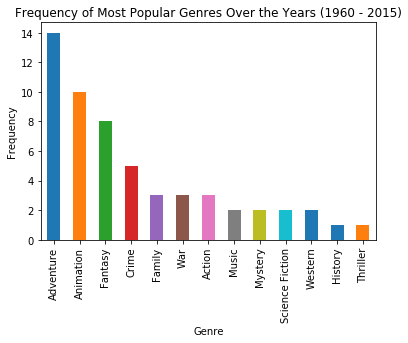

In [67]:
# bar chart of frequency
max_genre_pop_year['genres'].value_counts().plot(kind = 'bar')
plt.title("Frequency of Most Popular Genres Over the Years (1960 - 2015)")
plt.xlabel("Genre")
plt.ylabel("Frequency");

Though it is difficult and unproductive to see the most popular genre of every single year, with this bar chart we can find the most popular genres over the course of 1960 to 2015. Adventure genre was overall the most popular between 1960 and 2015, dominating fourteen of those years. Animation genre came in second with ten of those years. On the other end, History and Thriller genres have only been the most popular of one year each. 

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

In [68]:
df.columns

Index(['popularity', 'original_title', 'runtime', 'genres', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [69]:
# drop non-numerical columns
df_rev = df.drop(['original_title', 'genres', 'release_date'], axis = 1)
df_rev.head()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,2947,7.3,2015,1.747999e+08,1.385749e+09


In [70]:
df_rev.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looking at the descriptive statistics, there are movies with zero revenue (and zero budget). This doesn't make sense, so it is better to just remove them for the sake of the analysis.

In [71]:
# remove rows where revenue_adj is 0
df_rev = df_rev.query('revenue_adj != 0')
df_rev.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,1.045202,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,1.356752,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,0.001117,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,0.387740,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,0.680581,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,1.210502,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,32.985763,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


A matrix of scatterplots will give us a quick insight into the relationships among these numerical variables.

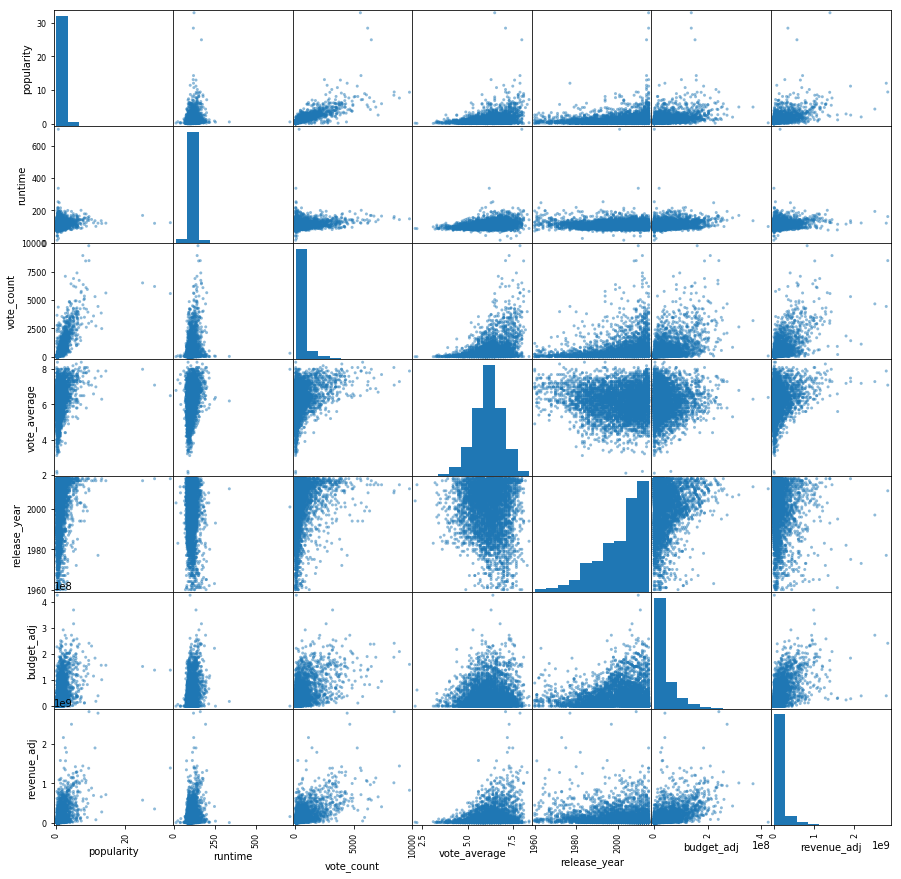

In [72]:
pd.plotting.scatter_matrix(df_rev, figsize = (15,15));

There is some semblance of a relationship between 'revenue_adj' and some of the variables, but there is still a lot of uncertainty. A correlation matrix may give us a clearer understanding of how 'revenue_adj' is actually correlated to these variables. 

In [73]:
df_rev.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.201212,0.788293,0.288988,0.170276,0.440049,0.561746
runtime,0.201212,1.000000,0.252323,0.308064,-0.099446,0.304123,0.263914
vote_count,0.788293,0.252323,1.000000,0.351291,0.196837,0.533281,0.666495
vote_average,0.288988,0.308064,0.351291,1.000000,-0.094828,0.049090,0.242319
release_year,0.170276,-0.099446,0.196837,-0.094828,1.000000,0.083306,-0.099447
budget_adj,0.440049,0.304123,0.533281,0.049090,0.083306,1.000000,0.593280
revenue_adj,0.561746,0.263914,0.666495,0.242319,-0.099447,0.593280,1.000000


This correlation matrix indicates that 'popularity', 'vote_count', and 'budget' have the highest correlation with 'revenue_adj'. However, it'd be more interesting to see how much one variable may impact revenue. Our research question is looking at properties associated with movies that specifically have _high_ revenue, so we will split revenue into two groups. High revenue is above the mean, and low revenue is below the mean. We will then look at the averages of the respective variables for movies with high revenue and movies with low revenue, to see how big the difference is between the two groups.

In [74]:
df_rev.revenue_adj.mean()

115100887.62834093

In [75]:
# split df_rev into high revenue and low revenue groups
high_rev = df_rev.query('revenue_adj > 115100887.62834081')
low_rev = df_rev.query('revenue_adj <= 115100887.62834081')

In [76]:
# examine popularity
high_rev_pop = high_rev['popularity'].mean()
low_rev_pop = low_rev['popularity'].mean()
diff_rev_pop = high_rev_pop - low_rev_pop
float("{:.2f}".format(diff_rev_pop))

1.28

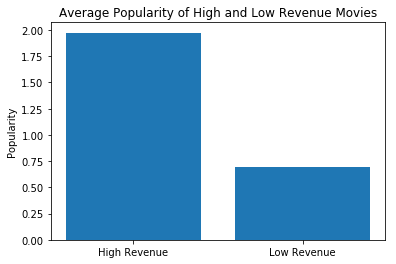

In [77]:
# bar chart of average popularities of high and low revenue movies
plt.bar([1, 2], [high_rev_pop,low_rev_pop], tick_label = ['High Revenue','Low Revenue'])
plt.title('Average Popularity of High and Low Revenue Movies')
plt.ylabel('Popularity');

On average, high revenue movies have a popularity 1.28 more than that of low revenue movies.

In [78]:
# examine vote count
high_rev_vote = high_rev['vote_count'].mean()
low_rev_vote = low_rev['vote_count'].mean()
diff_rev_vote = high_rev_vote - low_rev_vote
int(diff_rev_vote)

879

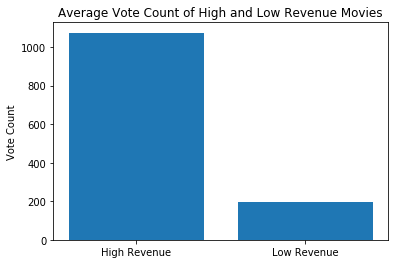

In [79]:
# bar chart of average vote counts of high and low revenue movies
plt.bar([1, 2], [high_rev_vote,low_rev_vote], tick_label = ['High Revenue','Low Revenue'])
plt.title('Average Vote Count of High and Low Revenue Movies')
plt.ylabel('Vote Count');

On average, high revenue movies have 879 more votes than that of low revenue movies.

In [80]:
# examine vote count
high_rev_budget = high_rev['budget_adj'].mean()
low_rev_budget = low_rev['budget_adj'].mean()
diff_rev_budget = high_rev_budget - low_rev_budget
int(diff_rev_budget)

54795341

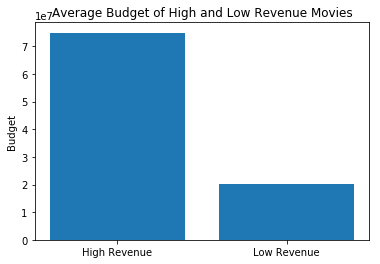

In [81]:
# bar chart of average budgets of high and low revenue movies
plt.bar([1, 2], [high_rev_budget,low_rev_budget], tick_label = ['High Revenue','Low Revenue'])
plt.title('Average Budget of High and Low Revenue Movies')
plt.ylabel('Budget');

On average, high revenue movies have a budget of almost $55M more than that of low revenue movies.

### Research Question 3: Has runtime changed over the years?


In [82]:
df_runtime = df.groupby('release_year')['runtime'].mean()
df_runtime.head()

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
Name: runtime, dtype: float64

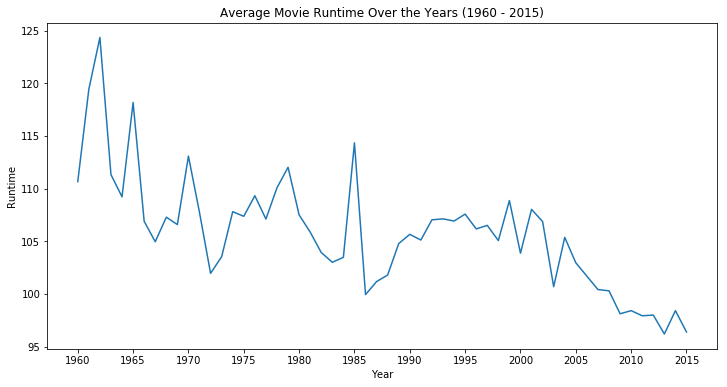

In [83]:
# line plot of average movie runtime of every year between 1960 and 2015
df_runtime.plot(figsize = (12, 6))
plt.xticks(np.arange(1960,2016,5))
plt.title('Average Movie Runtime Over the Years (1960 - 2015)')
plt.xlabel('Year')
plt.ylabel('Runtime');

Runtime has definitely decreased over the past couple decades. The peak average runtime was more than two hours, while in recent years it has been just a little more over 1.5 hours. The audience is less likely to find the time, interest, or patience to watch longer duration movies so this makes a lot of sense.

<a id='conclusions'></a>
## Conclusions

> After conducting a thorough investigation of this movie dataset, we can conclude that there are both single and multi variable trends within this dataset. Movies within the Adventure genre have historically been the most popular. There are positive correlations between revenue and other variables, specifically popularity, vote count, and budget. Movie runtime has also drastically decreased in the last 45 years. 

> Of course, all of these findings were not without their limitations. There were cases of missing values and duplicate data, in which they were just dropped from the dataset for sake of ease. There also requires some space for error due to all the aggregations and potentially brute calculations.

In [84]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0